In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [19]:
df = pd.read_csv("서울시_CCTV_인구_병합데이터.csv")
df.set_index('구별', inplace=True)
df.head()

,CCTV댓수,최근증가율,인구수,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,
종로구,1772,20.49,155106,9077,27605,5.85,17.80
용산구,2383,78.64,240665,14287,38884,5.94,16.16
성동구,3602,46.13,295767,6605,45591,2.23,15.41
광진구,2588,112.29,355306,12825,50815,3.61,14.30
동대문구,2497,34.85,352259,14219,61262,4.04,17.39


- 상관관계 분석

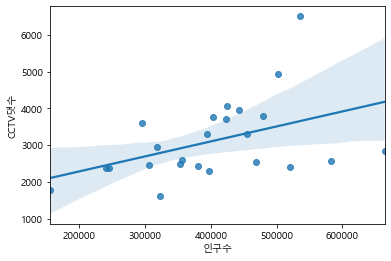

In [20]:
# CCTV 댓수 vs. 인구수, 외국인비율, 고령자비율
sns.regplot(x='인구수', y='CCTV댓수', data=df)
plt.show()

KeyError: 'feature'

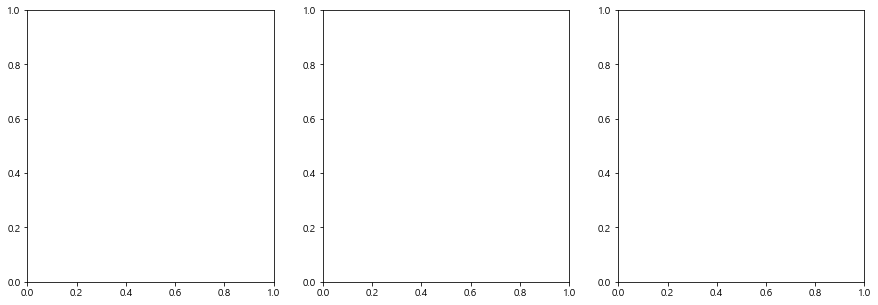

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
features = ['인구수', '외국인비율','고령자비율']
for i , feature in enumerate(features):
    sns.regplot(x='feature', y='CCTV댓수', data=df, ax=axs[i])

In [ ]:
for i, feature in enumerate(features):
    print(i, feature)

0 인구수
1 외국인비율
2 고령자비율


In [ ]:
len(axs)

In [ ]:
df.CCTV댓수.sort_value().plot(kind='barh', grid=True, figsize=(12, 6))
plt.title('구별 CCTV 댓수', fontsize=15)
plt.show()

NameError: name 'df' is not defined

- 인구 천명당 CCTV 댓수

In [ ]:
df['천명당CCTV'] = (df.CCTV댓수 / df.인구수 * 1000).round(2)
df.천명당CCTV.sort_value().plot(kind='barh', grid=True, figsize=(12, 6))
plt.title('구별 인구 천명당 CCTV 댓수', fontsize=15)
plt.show()

NameError: name 'df' is not defined

- 인구수와 CCTV 댓수 분석


In [ ]:
# 산점도(Scatter plot)
plt.scatter(x=df.인구수, y=df.CCTV댓수)
plt.plot(xs, ys, 'r-', lw=2) # r은 색깔. 
plt.grid()
plt.title("인구수와 CCTV 댓수의 산점도")
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show()

NameError: name 'df' is not defined

In [ ]:
np.polyfit(df.인구수, df.CCTV댓수, 1)

NameError: name 'df' is not defined

## 회귀선

* 회귀선과 산점도 사이의 오차

In [ ]:
df['오차'] = abs(df.CCTV댓수 - (df.인구수*weight+bias)).round(2)
df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head(10)

NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50)
plt.plot(xs, ys, 'r-', lw=2) # r은 색깔. 
plt.grid()
plt.title("인구수와 CCTV 댓수의 산점도")
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
plt.show()

NameError: name 'df' is not defined

<Figure size 1008x720 with 0 Axes>

- 최종그림 : text포함

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(x=df.인구수, y=df.CCTV댓수, c=df.오차, s=50)
plt.plot(xs, ys, 'g-', lw=2) # r은 색깔. 
for i in range(10) : 
    plt.text(df_sort.인구수[i]+9000, df_sort.CCTV댓수[i]-50,
             df_sort.index[i], fontsize=15) 
plt.grid()
plt.title("인구수와 CCTV 댓수의 산점도")
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()
# plt.show()
plt.savefig('서울시_인구수와_CCTV댓수의_관계.png')

NameError: name 'df' is not defined

<Figure size 1008x720 with 0 Axes>